**Newton multivariable**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import time

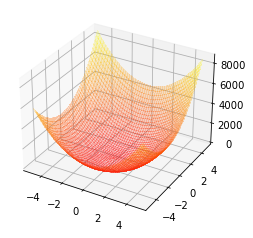

In [3]:
def f(x):
    k1 = 100    #N/m
    k2 = 90     #N/m
    Fx1,Fx2 = 20,40
    x1 = x[0]
    x2 = x[1]
    ans = k1*(np.sqrt(x1**2+(x2+1)**2)-1)**2 + k2*(np.sqrt(x1**2+(x2+1)**2)-1)**2 - (Fx1*x1+Fx2*x2)
    #print(type(ans))
    return ans

def plano(x1,x2):
    return 

X1 = np.arange(-5, 5, 0.01)
X2 = np.arange(-5, 5, 0.01)

x1, x2 = np.meshgrid(X1, X2)

#f = x1**2 + x2**2 - 2*x1 #primera función
z = f([x1,x2]) #segunda función


#hacemos una nueva figura
fig = plt.figure()
#axis
ax = fig.add_subplot(projection = '3d')

surf = ax.plot_surface(x1, x2, z, cmap=cm.autumn, linewidth=0, antialiased = False, alpha=0.2)

plt.show()

In [4]:
#Definciones de Hessiana y gradiente
#gradient one variable 
def gradient(x,delta):
    grad=np.zeros(2)
    grad[0]=(f([x[0]+delta,x[1]])- f([x[0]-delta,x[1]]))/(2*delta)
    grad[1]=(f([x[0],x[1]+delta])- f([x[0],x[1]-delta]))/(2*delta)
    return grad

def Hessian(x,delta):
    H=np.zeros([2,2])
    H[0,0]= (f([x[0]+delta,x[1]]) - 2*f([x[0],x[1]]) +  f([x[0]-delta,x[1]]))/(delta**2)
    H[1,1]= (f([x[0],x[1]+delta]) - 2*f([x[0],x[1]]) +  f([x[0],x[1]-delta]))/(delta**2)
    H[0,1]= (f([x[0]+delta,x[1]+delta]) - f([x[0]+delta,x[1]-delta]) - f([x[0]-delta,x[1]+delta]) +  f([x[0]-delta,x[1]-delta]))/(4*delta**2)
    H[1,0]= H[0,1]
    return H



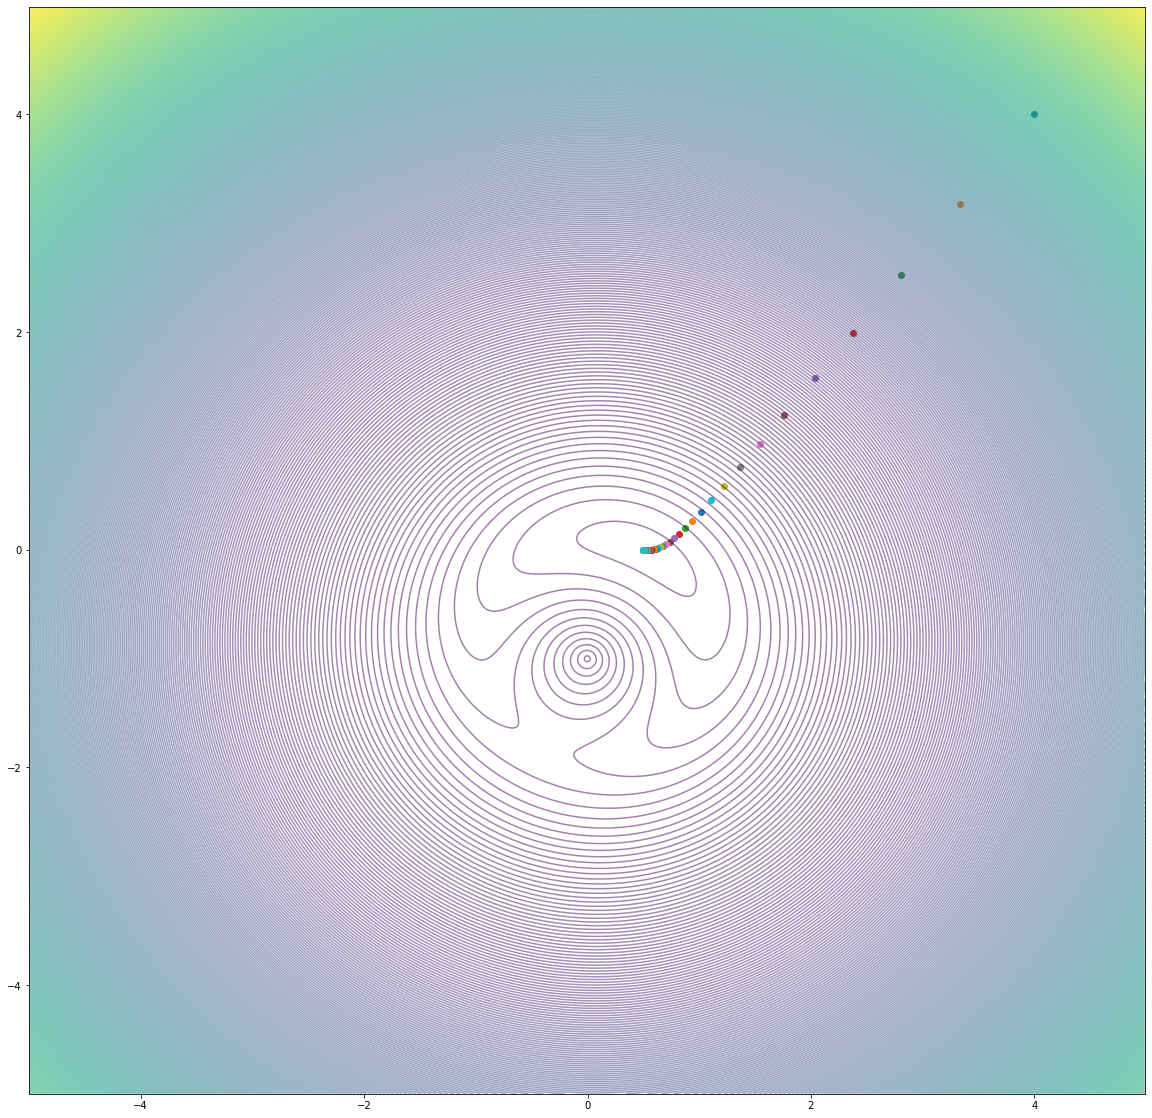

Tiempo = 9.562371969223022
[ 4.99954361e-01 -2.94907747e-04]
-7.352937600617825


In [5]:
delta = 0.01
epsilon1 = 0.01
epsilon2 = 0.01
iteraciones = 50
alpha = 0.2
X = [4,4]

t = time.time()

fig = plt.figure(figsize=(20,20))
#axis
#ax = fig.add_subplot(projection = '3d')
ax = fig.add_subplot()
surf = ax.contour(x1, x2, z,500, alpha=0.5)


for i in range(iteraciones):
    ax.scatter(X[0],X[1])
    #si = -np.linalg.inv(Hessian(X,delta=delta)) * gradient(X,delta=delta)
    si = -np.matmul(np.linalg.inv(Hessian(X,delta=delta)),gradient(X,delta=delta))
    X = X + alpha* si
    if si.any()<epsilon1: break

plt.show()
print("Tiempo =",time.time()-t)

print(X)
print(f(X))

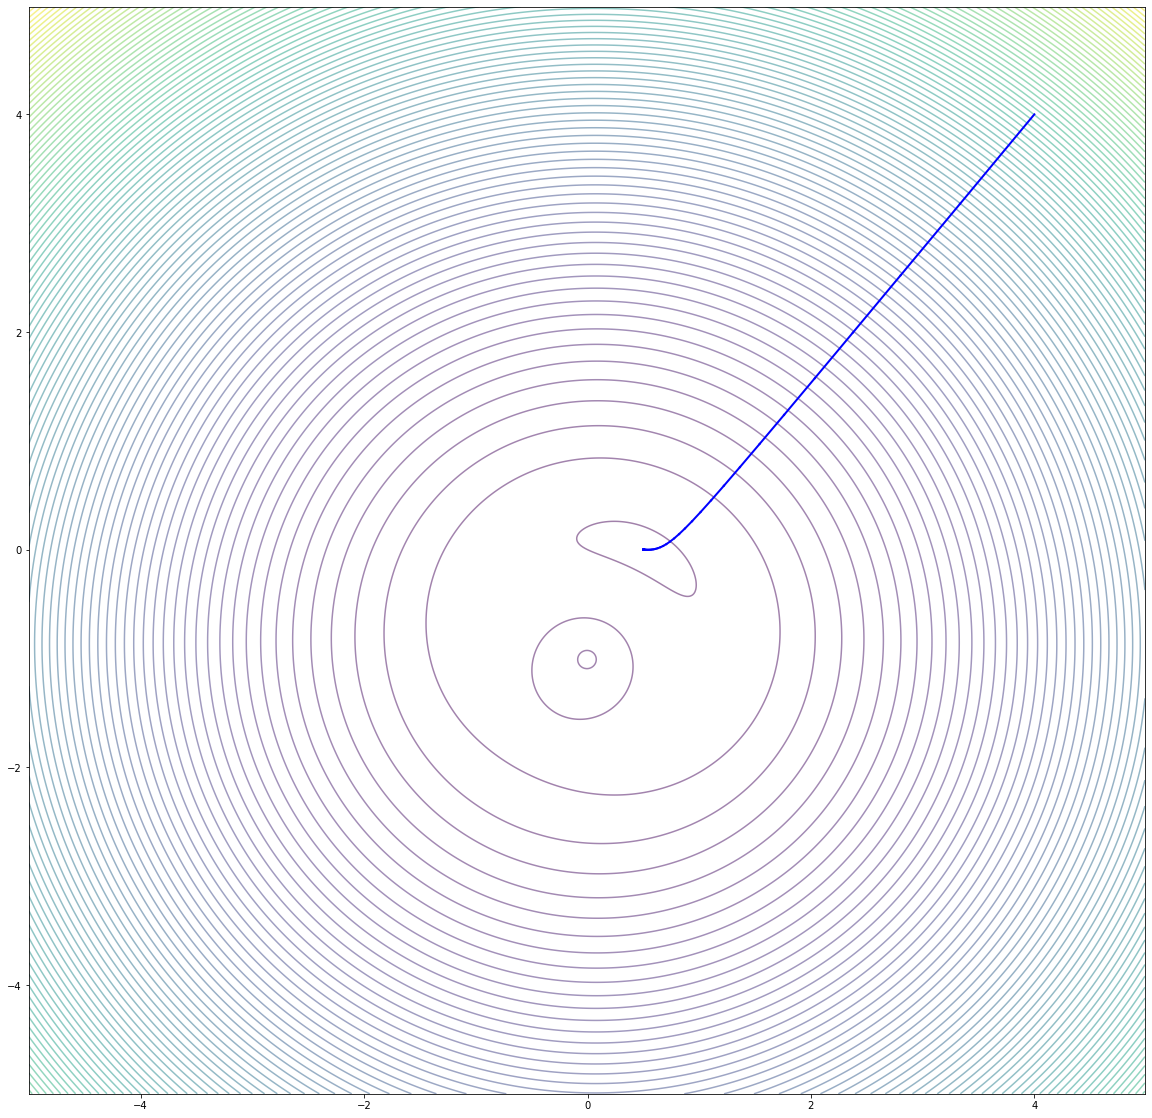

Tiempo = 2.8744311332702637
[ 4.99954361e-01 -2.94907747e-04]
-7.352937600617825


In [6]:
delta = 0.01
epsilon1 = 0.01
epsilon2 = 0.01
iteraciones = 50
alpha = 0.2
X = [4,4]
X1

t = time.time()

fig = plt.figure(figsize=(20,20))
#axis
#ax = fig.add_subplot(projection = '3d')
ax = fig.add_subplot()
surf = ax.contour(x1, x2, z,100, alpha=0.5)


for i in range(iteraciones):
    X1=X.copy()
    #si = -np.linalg.inv(Hessian(X,delta=delta)) * gradient(X,delta=delta)
    si = -np.matmul(np.linalg.inv(Hessian(X,delta=delta)),gradient(X,delta=delta))
    X = X + alpha* si
    ax.plot([X[0],X1[0]],[X[1],X1[1]],'b',linewidth=2)

plt.show()
print("Tiempo =",time.time()-t)

print(X)
print(f(X))